## EST.QA.1


Let ${\mathbf z} $ have a mixture of gaussians distribution 
where the two components have the distributions  $ {\mathbf z}_1 \sim N(\mu_1,\sigma^2_1) $ and 
$ {\mathbf z}_2 \sim N(\mu_2,\sigma^2_2) $ and $ w_2=1-w_1$.

Let us consider the dataset of $ N$ observations of $ {\mathbf z} $:
$$ D_N = [ 1.3, 0.85, 1, 1,  -0.83, 1.3, 1.3, 0.74, -1.2, -0.9, -0.93, 0.0, -1.14 ] $$

Suppose that $w_1 \in W_1 =\{ 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0 \} $

Code a Python script to find the value of $w_1 \in W_1 $ which maximises
the likelihood of the dataset if $ \mu_1=-1, \sigma_1=0.1, \mu_2=1, \sigma_2=0.1 $.


bestw= 0.4


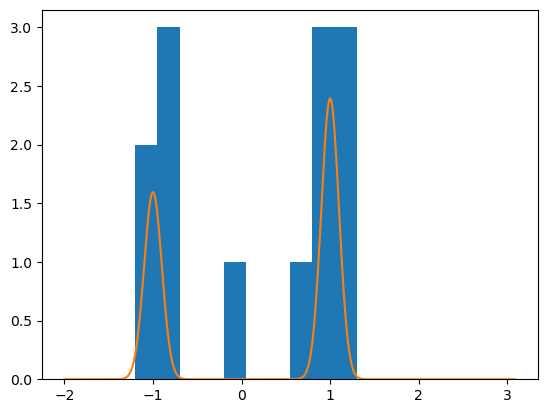

In [22]:
##Python code

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

np.random.seed(0)

mu1 = -1
sd1 = 0.1
mu2 = 1
sd2 = 0.1

def mixtdens(x, mu1, sd1, w1, mu2, sd2, w2):
    return w1 * norm.pdf(x, mu1, sd1) + w2 * norm.pdf(x, mu2, sd2)


DN = np.array([1.3, 0.85, 1, 1,  -0.83, 1.3, 1.3, 0.74, -1.2, -0.9, -0.93, 0.0, -1.14])
N = len(DN)
W1 = np.arange(0, 1.1, 0.1)

L = []
for w1 in W1:

    lik = 1
    for i in range(N):
        lik *= mixtdens(DN[i], mu1, sd1, w1, mu2, sd2, 1 - w1)
    L.append(lik)

w1=W1[np.argmax(L)]
print('bestw=',w1)


# Plot the histogram of DN (equivalent to hist(DN) in R)
plt.hist(DN)



# Create a sequence from -3 to 3 with increments of 0.1 (equivalent to seq(-3, 3, by = 0.1) in R)
z = np.arange(-2, 3.1, 0.01)

# Plot the line on the current plot.
# The expression w1*dnorm(z, -0.5, 1) + (1 - dnorm(z, 1, 1)) in R is translated using norm.pdf from scipy.stats
plt.plot(z, w1 * norm.pdf(z, loc=mu1, scale=sd1) + (1 - w1)*norm.pdf(z, loc=mu2, scale=sd2))

# Display the plot
plt.show()





## EST.QA.2

Let us consider a univariate random variable ${\mathbf z}$ with Normal distribution $N(\mu,\sigma^2)$, where $\mu=1 \text{ and } \sigma=1 $. 

Let $D_N={z_1,...,z_N}$ a i.i.d. dataset of size $N=100$ sampled from this distribution.

By implementing a Monte Carlo simulation with 10000 trials in Python, the student should compute the bias, variance and MSE of the following four estimators of the ratio $\frac{\mu}{\sigma}$: 

1. $\hat{\theta}_1= \frac{\hat{\mu}}{\hat{\sigma}}$
2. $ \hat{\theta}_2= \sum_{i=1}^N z_i $
3. $ \hat{\theta}_3= \frac{\sum_{i=1}^N (z_i-\hat{\mu})^3}{N \hat{\sigma}^3} $
4. $ \hat{\theta}_4= \frac{\sum_{i=1}^N (z_i-\hat{\mu})^4}{N \hat{\sigma}^4} $
where $ \hat{\mu}$ is the sample average and $\hat{\sigma}^2$  is the sample variance.

 

The student should answer the following questions:

1. Absolute value of bias of estimator 1 

2. Absolute value of bias of estimator 2 

3. Absolute value of bias of estimator 3 

4. Absolute value of bias of estimator 4 = {1:NUMERICAL:=2:0.2#}

5. Which estimator has the highest variance? 
  
6. Which estimator has the highest MSE? 
7. Which estimator has the lowest MSE? 



 

### Solution

In [23]:
import numpy as np
import sys


N = 100
S = 10000
mu = 1
sdev = 1
th = mu / sdev 

TH = None
# Initialize TH as an empty list to accumulate columns of results
TH_list = []

for s in range(1, S + 1):
    # DN = rnorm(N, mu, sd=sdev)
    DN = np.random.normal(mu, sdev, N)
    that = []
    muhat = np.mean(DN)
    # Note: In R, sd() calculates sample standard deviation (n-1 in the denominator)
    sdhat = np.std(DN, ddof=1)
    
    for num in range(1, 5):
        if num == 1:
            that.append(np.mean(DN) / np.std(DN, ddof=1))
        if num == 2:
            that.append(np.sum(DN))
        if num == 3:
            that.append(np.mean((DN - muhat) ** 3) / (sdhat ** 3))
        if num == 4:
            that.append(np.mean((DN - muhat) ** 4) / (sdhat ** 4))
    # In R, cbind(TH, that) binds the vector 'that' as a new column.
    TH_list.append(that)

# Convert list of results to a NumPy array and transpose it to match the R structure (rows correspond to numbers 1:4)
TH = np.array(TH_list).T

B2 = None
V = None
MSE = None

for num in range(1, 5):
    # Calculate bias as the absolute difference between mean(TH[num,]) and th
    curr_mean = np.mean(TH[num - 1, :])
    # Calculate variance using sample variance (ddof=1) to match R's var()
    curr_var = np.var(TH[num - 1, :], ddof=1)
    curr_mse = np.mean((TH[num - 1, :] - th) ** 2)
    sys.stdout.write("est= {} : |Bias|= {} Var= {} MSE= {}\n".format(num, abs(curr_mean - th), curr_var, curr_mse))
    


est= 1 : |Bias|= 0.009072883328914205 Var= 0.015208260256406234 MSE= 0.01528905664228068
est= 2 : |Bias|= 99.15121465155362 Var= 98.47270607422827 MSE= 9929.426225682082
est= 3 : |Bias|= 1.0021556160598943 Var= 0.0555988792693199 MSE= 1.0599091981817792
est= 4 : |Bias|= 1.8823899297225806 Var= 0.19829813729232176 MSE= 3.7416701549995763


## EST.QA.3


Let us consider a univariate random variable $\mathbf z$ with Normal distribution $N(\mu,\sigma^2)$ where $\mu=1 \text{ and } \sigma=1 $.  It is known that the kurtosis of a Normal distribution is equal to 3.

Let $D_N={z_1,...,z_N} $ a i.i.d. dataset of size N=100 sampled from this distribution.

By implementing a Monte Carlo simulation with 10000 trials in R, the student should compute the bias, variance and MSE of the following four estimators of the kurtosis: 

1. $ \hat{\theta}_1= \frac{\hat{\mu}}{\hat{\sigma}}$
2. $\hat{\theta}_2= \sum_{i=1}^N z_i $
3. $\hat{\theta}_3= \frac{\sum_{i=1}^N (z_i-\hat{\mu})^3}{N \hat{\sigma}^3} $
4. $\hat{\theta}_4= \frac{\sum_{i=1}^N (z_i-\hat{\mu})^4}{N \hat{\sigma}^4} $
where $ \hat{\mu} $ is the sample average and $\hat{\sigma}^2$ is the sample variance.

 

The student should answer the following questions:

1. Absolute value of bias of estimator 1 
2. Absolute value of bias of estimator 2 
3. Absolute value of bias of estimator 3 
4. Absolute value of bias of estimator 4 
5. Which estimator has the highest variance? 
6. Which estimator has the highest MSE? 
7. Which estimator has the lowest MSE? 



 

 

### Solution

In [25]:
import numpy as np

N = 100
S = 10000

mu = 1
sdev = 1

NTH = [12, 11, 2, 1]
th = 3  ## kurtosis 


TH = []  # will store each simulation result as a list (each element is a column vector)
for s in range(1, S+1):
    DN = np.random.normal(mu, sdev, N)
    
    muhat = np.mean(DN)
    sdhat = np.std(DN, ddof=1)
    thetahat1 = np.mean(DN) / np.std(DN, ddof=1)
    thetahat2 = np.sum(DN)
    thetahat3 = np.mean((DN - muhat)**3) / sdhat**3
    thetahat4 = np.mean((DN - muhat)**4) / sdhat**4
    that = [thetahat1, thetahat2, thetahat3, thetahat4]
    TH.append(that)

# Convert TH to a numpy array of shape (S, 4) then transpose to shape (4, S) to mimic R's cbind behavior
TH = np.array(TH).T

B2 = []
V = []
MSE = []
for num in range(1, len(NTH)+1):
    est_mean = np.mean(TH[num-1, :])
    est_var = np.var(TH[num-1, :], ddof=1)
    bias = abs(est_mean - th)
    mse = np.mean((TH[num-1, :] - th)**2)
    B2.append(bias)
    V.append(est_var)
    MSE.append(mse)
    print("theta=", th, " est=", num, ": B2=", bias, "V=", est_var, "MSE=", mse)
print("\n --\n")


theta= 3  est= 1 : B2= 1.993363524290183 V= 0.015598689731318942 MSE= 3.9890952698329247
theta= 3  est= 2 : B2= 96.90536820703214 V= 100.04940195381458 MSE= 9490.689784354097
theta= 3  est= 3 : B2= 2.9988072840579614 V= 0.05345084437051492 MSE= 9.046290626205163
theta= 3  est= 4 : B2= 0.12412213527078375 V= 0.19045847766400612 MSE= 0.20584573628041844

 --



## EST.QA.4
Let $ {\mathbf z} \sim U(-2,u) $ an uniformly distributed random variable between -2 and $u$.

Let us consider the dataset of $N=10$ observations of $ {\mathbf z} $:
$ D_N = [ 1.3, -0.3,  1.0,  -1.3,  0.4, -1.5, -0.9, -0.3,  0.1,  2.4 ] $

Suppose that $u \in U =\{ -1.5, -1.0, -0.5,  0.0 , 0.5,  1.0,  1.5 , 2.0,  2.5 , 3.0\} $

Code an Python script to find the value of $u \in U $, which maximises
the likelihood of the dataset.




In [26]:
## Python code

import numpy as np
from scipy.stats import uniform
np.random.seed(0)
low = -2
def dens(x, low, up):
    return uniform.pdf(x, loc=low, scale=up - low)

N = 10
DN = [1.3, -0.3, 1.0, -1.3, 0.4, -1.5, -0.9, -0.3, 0.1, 2.4]
UP = np.arange(-1.5, 3.0 + 0.5, 0.5)
L = []

for up in UP:
    lik = 1
    for i in range(N):
        lik *= dens(DN[i], low, up)
    L.append(lik)

print(UP[np.argmax(L)])



2.5


## EST.QA.5
Consider a binary random variable $\mathbf y \in \{0,1\}$ and a continuous random variable $\mathbf x$.

Suppose that 
$P(\mathbf y =1 | x )= \frac{1}{1+\exp^{-wx}}$ where $w$ is integer that takes value in $[-10,10]$.

Consider a dataset $D$ generated by the Python code here below.

1. Find the value of $w$ that maximises the likelihood of the observed dataset.
2. Find the value of $w$ that maximises the likelihood of the observed dataset by supposing that $w$ is continuous and using the python function [minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html)


                     

In [ ]:
np.random.seed(0)
N=50
mu1=1
sdev1=1
D1=np.random.normal(mu1, sdev1, N)

mu2=-1
sdev2=1
D2=np.random.normal(mu2, sdev2, N)

D = np.column_stack((np.concatenate((D1, D2)),
                     np.concatenate((np.zeros(N), np.zeros(N) + 1))))

### Solution

-2


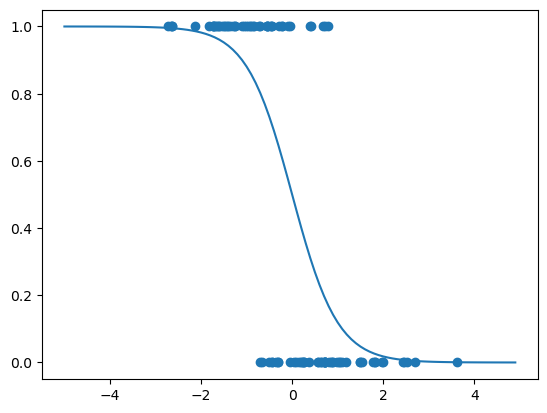

In [61]:

def condprob(x,w):
    ## P(y=1 |x)
    return(1/(1+np.exp(-w*x)))
    

## Dataset generation
N=50
mu1=1
sdev1=1
D1=np.random.normal(mu1, sdev1, N)
mu2=-1
sdev2=1
D2=np.random.normal(mu2, sdev2, N)
D = np.column_stack((np.concatenate((D1, D2)),
                     np.concatenate((np.zeros(N), np.zeros(N) + 1))))




N=D.shape[0]
W = np.arange(-10, 10, 1)
L = []
for w in W:
    lik = 1
    for i in range(N):
        if (D[i,1]==1):
            lik *= condprob(D[i,0], w)
        else:
            lik *= (1-condprob(D[i,0], w))
    L.append(lik)

mlw=W[np.argmax(L)]
print(mlw)

x=np.arange(-5, 5, 0.1)
plt.scatter(D[:,0],D[:,1])
plt.plot(x,condprob(x,mlw))


In [85]:
## Solution with use of the function minimize

import numpy as np
from scipy.optimize import minimize

def condprob(x,w):
    ## P(y=1 |x)
    return(1/(1+np.exp(-w*x)))
    
# Define the function to minimize

## log-likelihood function
def LL(w,D):
    N=D.shape[0]
    lik = 1
    for i in range(N):
        if (D[i,1]==1):
            lik += np.log(condprob(D[i,0], w))
        else:
            lik += np.log((1-condprob(D[i,0], w)))
    
    return -lik

# Initial guess
initial_w = 0
wbounds = [(-5, 5)]


## Dataset generation
N=50
mu1=1
sdev1=1
D1=np.random.normal(mu1, sdev1, N)
mu2=-1
sdev2=1
D2=np.random.normal(mu2, sdev2, N)
D = np.column_stack((np.concatenate((D1, D2)),
                     np.concatenate((np.zeros(N), np.zeros(N) + 1))))


# Perform the minimization
result = minimize(LL, initial_w,bounds=wbounds,args=D)

# Print the results
print("Max-likelihood value of w:", result.x)



Max-likelihood value of w: [-2.23594824]


## EST.QA.6

Let $\mathbf x \sim N(0,1)$ and $\mathbf y= 3 \mathbf x+ \mathbf w$  where $\mathbf w \sim N(0,0.1)$.

In other terms, the conditional density of $\mathbf y$ given $\mathbf x=x$ is $N(3 x,0.1)$.

Generate a dataset of $N=100$ observations $x_i,y_i$.

Find the maximum likelihood value of
$b$ in the model $\mathbf y= b \mathbf x$ where $b \in [-5,5]$.

In [103]:
np.random.seed(0)

## Data generation
N=100
X=np.random.normal(size=N)
varw=0.1
Y=3*X.reshape(N,1)+np.random.normal(0,np.sqrt(varw),N)

D = np.column_stack((X,Y))

def LL(w,D):
    N=D.shape[0]
    lik = 0
    for i in range(N):
            lik += np.log(norm.pdf(D[i,1], loc=w*D[i,0], scale=np.sqrt(varw)))
    
    return -lik

# Initial guess
initial_b = 0
bbounds = [(-5, 5)]

# Perform the minimization
result = minimize(LL, initial_b,bounds=bbounds,args=D)

# Print the results
print("Max-likelihood value of b:", result.x)


Max-likelihood value of b: [3.03493803]


## EST.QA.7
We want to estimate expected mean of a Gaussian r.v. 
${\mathbf z} \sim N(\theta,\sigma^2$ where $\theta=5$ and $\sigma=2$
using a dataset of size $N=50$.

Consider a regularized estimator 

$$\hat{\theta}_r= \lambda \theta_0 +(1-\lambda) \frac{\sum_{i=1}^{N'} z_i}{N'}$$ 
where $\theta_0=3$, $N' <N$.

Study the impact of the value of $\lambda$ on bias, variance and MSE of $\hat{\theta}_r$



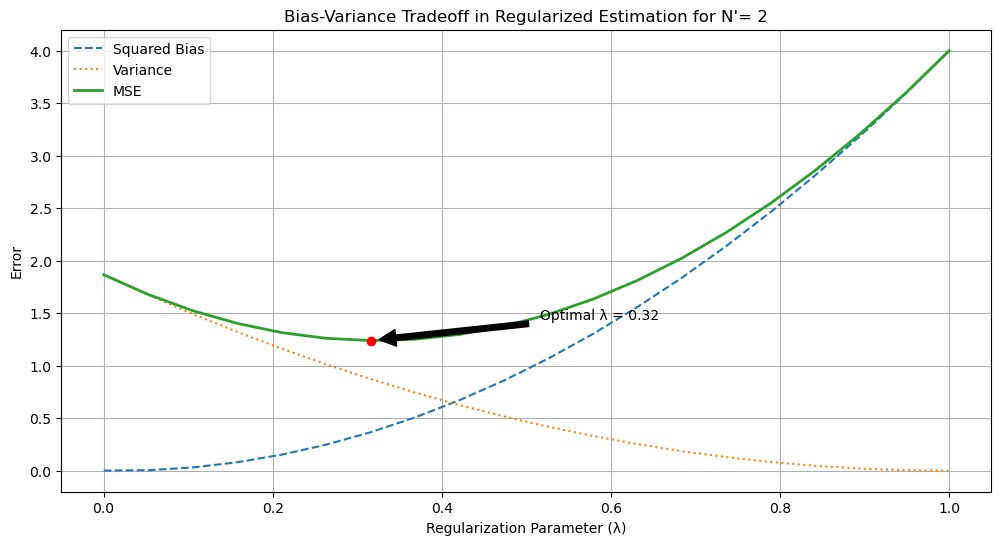


Results at optimal λ = 0.316 :
Squared Bias: 0.367
Variance: 0.873
MSE: 1.240
B^2+V: 1.240


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def generate_samples(true_mean, std_dev, N, R):
    """Generate multiple sets of samples from a normal distribution."""
    return np.random.normal(true_mean, std_dev, size=(R, N))

def regularized_mean(DN, theta0, lam,Nprime):
    R,N=DN.shape
    if Nprime >=N:
        raise ValueError("Error: N'>=N.")       
    estim = np.mean(DN[:,:Nprime],1)
    return (lam*theta0+(1-lam)*estim) 

def calculate_metrics(estimates, theta):
    """Calculate bias, variance, and MSE of the estimator."""
    bias = np.mean(estimates) - theta
    variance = np.var(estimates)
    mse = np.mean((estimates-theta)**2)
    return bias, variance, mse

# Simulation parameters
theta = 5.0
std_dev = 2.0
N = 50
R = 1000
lambda_values = np.linspace(0, 1, 20)
theta0=3
Nprime=2

# Store results
results = {
    'bias': [],
    'variance': [],
    'mse': []
}

# Generate data once
DN = generate_samples(theta, std_dev, N, R)

# Calculate metrics for different regularization strengths
for lambda_reg in lambda_values:
    
    
    estimates = regularized_mean(DN, theta0, lambda_reg,Nprime)
    bias, variance, mse = calculate_metrics(estimates, theta)
    
    results['bias'].append(bias)
    results['variance'].append(variance)
    results['mse'].append(mse)

# Plotting
plt.figure(figsize=(12, 6))

# Plot bias, variance, and MSE
plt.plot(lambda_values, np.square(results['bias']), 
         label='Squared Bias', linestyle='--')
plt.plot(lambda_values, results['variance'], 
         label='Variance', linestyle=':')
plt.plot(lambda_values, results['mse'], 
         label='MSE', linewidth=2)

plt.xlabel('Regularization Parameter (λ)')
plt.ylabel('Error')
plt.title(f"Bias-Variance Tradeoff in Regularized Estimation for N'= {Nprime}")
plt.legend()
plt.grid(True)

# Find optimal lambda
optimal_lambda_idx = np.argmin(results['mse'])
optimal_lambda = lambda_values[optimal_lambda_idx]
min_mse = results['mse'][optimal_lambda_idx]

# Add annotation for optimal point
plt.plot(optimal_lambda, min_mse, 'ro')
plt.annotate(f'Optimal λ = {optimal_lambda:.2f}',
            xy=(optimal_lambda, min_mse),
            xytext=(optimal_lambda + 0.2, min_mse + 0.2),
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

# Print numerical results for optimal lambda
print(f"\nResults at optimal λ = {optimal_lambda:.3f} :")
print(f"Squared Bias: {results['bias'][optimal_lambda_idx]**2:.3f}")
print(f"Variance: {results['variance'][optimal_lambda_idx]:.3f}")
print(f"MSE: {results['mse'][optimal_lambda_idx]:.3f}")
print(f"B^2+V: {results['bias'][optimal_lambda_idx]**2+results['variance'][optimal_lambda_idx]:.3f}")